In [1]:
import sys
import os

sys.path.insert(1, 'c:\\Users\\UROP\\OneDrive - Imperial College London\\MAGPIE\\python\\synthPy')
import field_generator.gaussian1D as g1
import matplotlib.pyplot as plt
import numpy as np
import utils.cmpspec as cm

Generate a 1D field using FFT method.

In [2]:
def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 0.5)

n = 1000
field_1D = g1.gaussian1D(k41)

C:\Users\UROP\AppData\Local\Temp\ipykernel_5128\2206358136.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a
c:\Users\UROP\OneDrive - Imperial College London\MAGPIE\python\synthPy\field_generator\gaussian1D.py:142: RuntimeWarning: invalid value encountered in multiply
  F = W*np.sqrt(self.k_func(K)) # power spectra follows power law, so sqrt here.


Text(0, 0.5, 'noise')

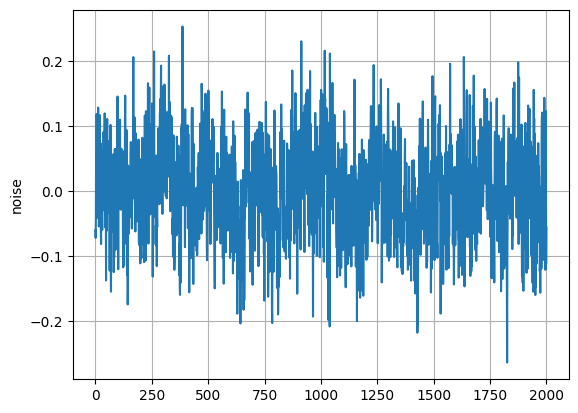

In [3]:
d = 1
sig = field_1D.fft(n)


plt.plot(sig)
plt.grid()
plt.ylabel('noise')

Calculate the Power Spectrum:

In [4]:


_, wn, ps = cm.compute1Dspectrum(sig, 5)
plt.plot(wn,ps, 'x')
plt.plot(wn, 0.002*k41(wn), label = 'calculated')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('wavenumber')

print(np.min(wn))



AttributeError: module 'utils.cmpspec' has no attribute 'compute1Dspectrum'

2D GEN AND SAVE TEST

In [ ]:
import field_generator.gaussian2D as g2


def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 2)



field_2D = g2.gaussian2D(k41)
N = 1000
sig = field_2D.fft(1000)

C:\Users\UROP\AppData\Local\Temp\ipykernel_10196\1554505433.py:5: RuntimeWarning: divide by zero encountered in power
  return k**-a


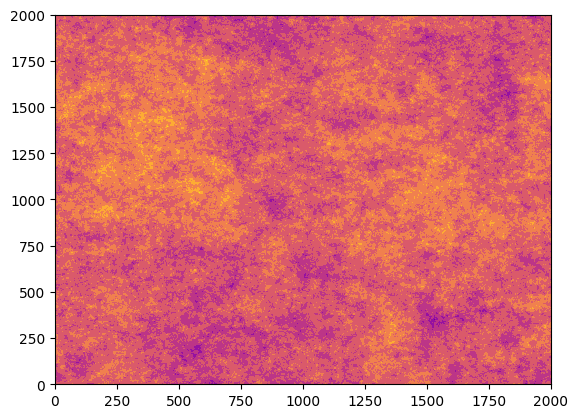

In [ ]:
ax, fig = plt.subplots()
M = 2*N +1
X, Y = np.meshgrid(np.arange(0,2001),np.arange(0,2001))
cp = plt.contourf(X, Y, sig[:,:], cmap = 'plasma')

C:\Users\UROP\AppData\Local\Temp\ipykernel_10196\3071263138.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


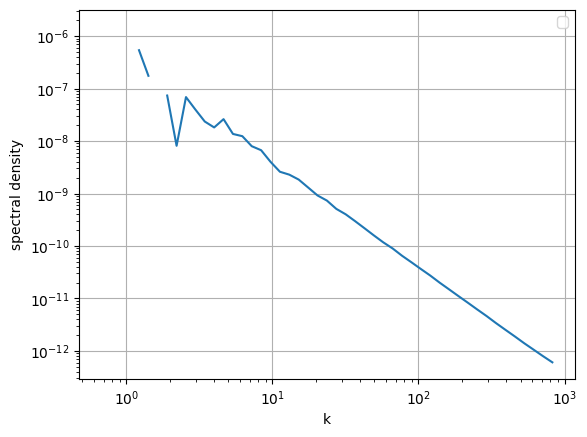

In [ ]:
_, wn, ps = cm.compute2Dspectrum_new(sig, 10, 10)

plt.plot(wn, ps)
plt.xscale('log')
plt.yscale('log')


min_i = np.where(ps > 1e-22)[0][0]
max_i = np.where(ps > 1e-22)[0][-1]




# from lmfit.models import ExpressionModel
# mod = ExpressionModel('c*x + a')
# mod.make_params()
# mod.set_param_hint('a', value = 1)
# mod.set_param_hint('c', value = -5/3)
# res0     =   mod.fit(np.array(np.log(ps[min_i : max_i + 1])), x = np.log(wn[min_i : max_i + 1]), nan_policy='omit')
# print(res0.fit_report())

# plt.plot(wn[min_i : max_i + 1 ], np.exp(res0.best_fit), label = f"gradient = {np.round(-res0.params['c'].value, 2)}, ideal={np.round(5/3, 2)}")





plt.xlabel('k')
plt.ylabel('spectral density')

plt.grid()
plt.legend()
plt.show()



New FFT gen:

IndexError: index -1 is out of bounds for axis 0 with size 0

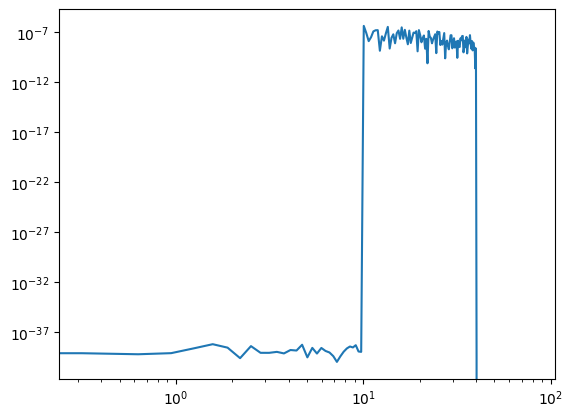

In [ ]:
from importlib import reload
import field_generator.new_fft as f1
reload(f1)



l_max = 2*np.pi/(10**1)

extent = 10

res = 128

l_min = 2*np.pi/(10**3)
def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 7/3)


x, noise =f1.fft_1D(l_max, l_min, extent, res, k41)

# plt.plot(x, noise)
# plt.show()

import utils.cmpspec as cm 
import utils.calculate_spectrum_3d as c3s


_, wn, ps = cm.compute1Dspectrum(noise, 2*extent)

# wn, ps = c3s.spectrum_1D_scalar(noise, l_min, k_bin_num= 500)


plt.plot(wn, ps)




plt.xscale('log')
plt.yscale('log')

k_min, k_max = 2*np.pi/l_max, 2*np.pi/l_min

min_i = np.where(np.round(wn, 0) == np.round(k_min, 0))[0][0]
max_i = np.where(np.round(wn, 0) == np.round(k_max, 0))[0][-1]




plt.xscale('log')
plt.yscale('log')
# 
from lmfit.models import ExpressionModel
mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0     =   mod.fit(np.array(np.log(ps[min_i : max_i + 1])), x = np.log(wn[min_i : max_i + 1]), nan_policy='omit')
print(res0.fit_report())

plt.plot(wn[min_i : max_i + 1], np.exp(res0.best_fit), label = f"gradient = {np.round(-res0.params['c'].value, 2)}, ideal={np.round(7/3, 2)}")





plt.xlabel('k')
plt.ylabel('spectral density')
plt.vlines([2*np.pi/l_max, 2*np.pi/l_min], 0, 2500, linestyle = 'dashed', label = '$k_{min}, k_{max}$')
plt.grid()
plt.legend()
plt.show()

[[Model]]
    <lmfit.ExpressionModel('c*x + a')>
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 42
    # variables        = 2
    chi-square         = 1.27952190
    reduced chi-square = 0.03198805
    Akaike info crit   = -142.629691
    Bayesian info crit = -139.154352
    R-squared          = 0.99720530
[[Variables]]
    c: -1.66643596 +/- 0.01394872 (0.84%) (init = -1.666667)
    a: -33.2955991 +/- 0.05092018 (0.15%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, a) = -0.8404


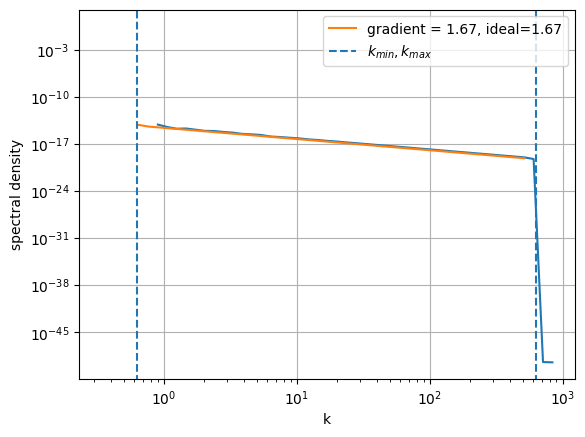

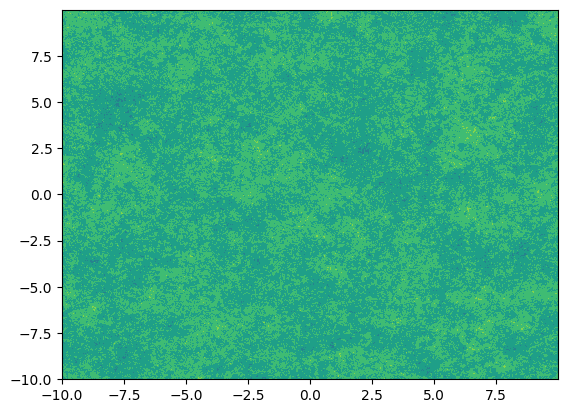

In [ ]:
import sys
import os

sys.path.insert(1, 'c:\\Users\\UROP\\OneDrive - Imperial College London\\MAGPIE\\python\\synthPy')
import field_generator.gaussian1D as g1
import matplotlib.pyplot as plt
import numpy as np
import utils.cmpspec as cm
import sys
import os
import numpy as np
sys.path.insert(1, 'c:\\Users\\UROP\\OneDrive - Imperial College London\\MAGPIE\\python\\synthPy')


from importlib import reload
import field_generator.new_fft as f1
from scipy.stats import linregress
import matplotlib.pyplot as plt
import utils.calculate_spectrum_3d as c3s
reload(f1)
reload(cm)


l_max = 10
l_min = 0.01
extent = 10
res = 2048

k_min = 2 * np.pi / l_max

k_max = 2 * np.pi / l_min


def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 5/3)

xx, yy, field_2d= f1.fft_2D(l_max, l_min, extent, res, k41)
_, wn, ps = cm.compute2Dspectrum_new(field_2d, 2*extent, 2*extent)

ps = ps

plt.plot(wn, ps)
plt.xscale('log')
plt.yscale('log')

k_min, k_max = 2*np.pi/l_max, 2*np.pi/l_min

min_i = np.where(ps > 1e-27)[0][0]
max_i = np.where(ps > 1e-27)[0][-1]




from lmfit.models import ExpressionModel
mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0     =   mod.fit(np.array(np.log(ps[min_i : max_i + 1])), x = np.log(wn[min_i : max_i + 1]), nan_policy='omit')
print(res0.fit_report())

plt.plot(wn[min_i : max_i ], np.exp(res0.best_fit), label = f"gradient = {np.round(-res0.params['c'].value, 2)}, ideal={np.round(5/3, 2)}")





plt.xlabel('k')
plt.ylabel('spectral density')
plt.vlines([2*np.pi/l_max, 2*np.pi/l_min], 0, 2500, linestyle = 'dashed', label = '$k_{min}, k_{max}$')
plt.grid()
plt.legend()
plt.show()

plt.contourf(xx, yy, field_2d)

3D perturbation:

field generated!


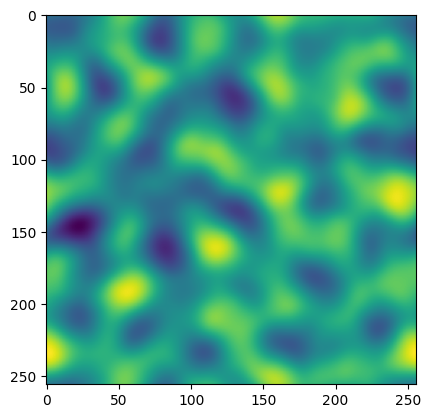

In [ ]:
import sys
import os

sys.path.insert(1, 'c:\\Users\\UROP\\OneDrive - Imperial College London\\MAGPIE\\python\\synthPy')
import field_generator.gaussian1D as g1
import matplotlib.pyplot as plt
import numpy as np
import utils.cmpspec as cm
import sys
import os
import numpy as np


from importlib import reload
import field_generator.new_fft as f1
from scipy.stats import linregress

import utils.calculate_spectrum_3d as c3s
reload(f1)
reload(cm)


l_max = 20
l_min = 2*np.pi/10
extent = 50
res = 128

k_min = 2 * np.pi / l_max

k_max = 2 * np.pi / l_min


def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 10)


xx, yy, zz, field_3d = f1.fft_3D(l_max, l_min, extent, res, k41)

print('field generated!')
plt.imshow(field_3d[:,:,10])
plt.show()



[[Model]]
    <lmfit.ExpressionModel('c*x + a')>
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 32
    # variables        = 2
    chi-square         = 0.29668939
    reduced chi-square = 0.00988965
    Akaike info crit   = -145.785773
    Bayesian info crit = -142.854301
    R-squared          = 0.99990985
[[Variables]]
    c: -9.96343812 +/- 0.01727281 (0.17%) (init = -1.666667)
    a: -33.2849537 +/- 0.01989816 (0.06%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, a) = -0.4684


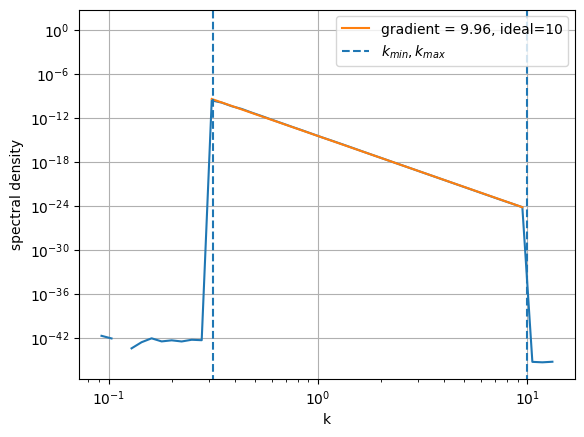

In [ ]:

_, wn, ps = cm.compute3Dspectrum_new(field_3d, 2*extent, 2*extent, 2*extent)

ps = ps

plt.plot(wn, ps)
plt.xscale('log')
plt.yscale('log')

k_min, k_max = 2*np.pi/l_max, 2*np.pi/l_min

min_i = np.where(ps > 1e-30)[0][0]
max_i = np.where(ps > 1e-30)[0][-1]




from lmfit.models import ExpressionModel
mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0     =   mod.fit(np.array(np.log(ps[min_i : max_i + 1])), x = np.log(wn[min_i : max_i + 1]), nan_policy='omit')
print(res0.fit_report())

plt.plot(wn[min_i : max_i + 1], np.exp(res0.best_fit), label = f"gradient = {np.round(-res0.params['c'].value, 2)}, ideal={np.round(10, 2)}")





plt.xlabel('k')
plt.ylabel('spectral density')
plt.vlines([2*np.pi/l_max, 2*np.pi/l_min], 0, 2500, linestyle = 'dashed', label = '$k_{min}, k_{max}$')
plt.grid()
plt.legend()
plt.show()



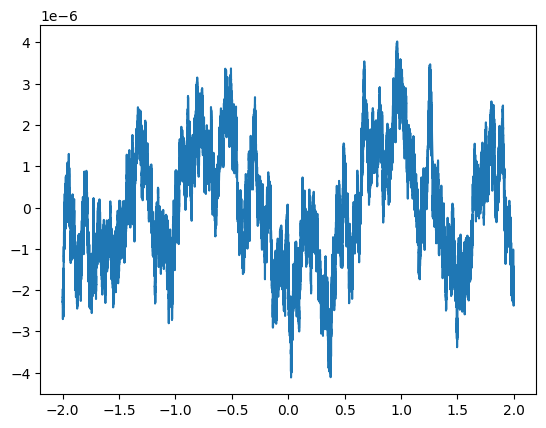

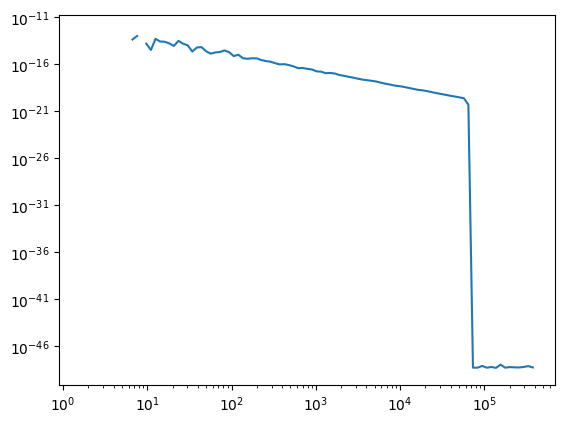

In [14]:
import sys

sys.path.insert(1, 'c:\\Users\\UROP\\OneDrive - Imperial College London\\MAGPIE\\python\\synthPy')
import field_generator.gaussian1D as g1
import field_generator.gaussian2D as g2
import utils.power_spectrum as spectrum
import matplotlib.pyplot as plt

def k41(x):
    return x**(-5/3)

field = g1.gaussian1D(k41)

x, noise = field.domain_fft(2, 0.0001, 2, 256000)

plt.plot(x, noise)
plt.show()

_, wn, ps = spectrum.radial_1Dspectrum(noise, 4)


plt.plot(wn, ps)
plt.xscale('log')
plt.yscale('log')

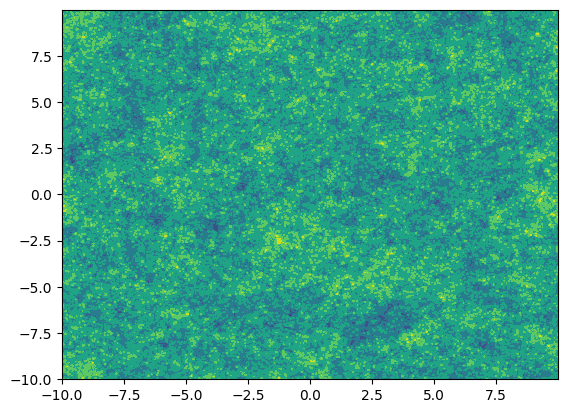

c:\Users\UROP\miniconda3\envs\local_env\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\UROP\miniconda3\envs\local_env\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


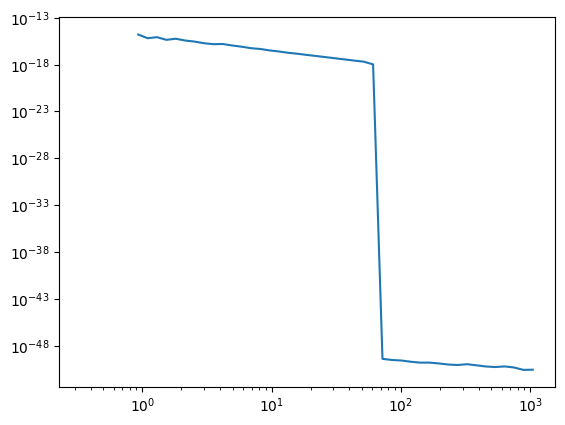

In [12]:

def k41(x):
    return x**(-5/3)

field = g2.gaussian2D(k41)

x, y,  noise = field.domain_fft(10, 0.1, 10, 2560)

plt.contourf(x, y, noise)
plt.show()

_, wn, ps = spectrum.radial_2Dspectrum(noise, 20, 20)


plt.plot(wn, ps)
plt.xscale('log')
plt.yscale('log')